## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import dataset

In [2]:
dataset = pd.read_csv('Data/Energy_System.csv')
display(dataset.head())
print(len(dataset))

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


9568


Working with a dataset that predicts the Energy output of a system based on its 

+ AT = Ambient temperatur
+ V = Vaccume Levels
+ Ambient Pressure
+ Relative Humidity

Those these values are irrelevent as this is more of a demo than an actual production model

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Train test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
## could be using random stae for replicable results but choose to not include

# Multiple Linear Regression

## Train Model

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predict Results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[485.58 478.65]
 [469.41 471.03]
 [469.9  475.14]
 ...
 [468.05 461.71]
 [464.56 467.72]
 [466.79 464.79]]


## Check Accuracy

In [7]:
from sklearn.metrics import r2_score
MLR = r2_score(y_test, y_pred)
MLR

0.9255158652382797

# PolyNomial Regression

## Train Model

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predict Results

In [9]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[488.26 478.65]
 [470.8  471.03]
 [472.6  475.14]
 ...
 [469.46 461.71]
 [464.96 467.72]
 [467.36 464.79]]


## Check Accuracy

In [10]:
from sklearn.metrics import r2_score
PR = r2_score(y_test, y_pred)
PR

0.9380240143253361

# Support vector Regression

## Train Model

In [11]:
## data sdjustments
y_train_SVM = y_train.reshape(len(y_train),1)
y_test_SVM = y_test.reshape(len(y_test),1)
X_train_SVM = X_train
X_test_SVM = X_test

## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_SVM = sc_X.fit_transform(X_train_SVM)
y_train_SVM = sc_y.fit_transform(y_train_SVM)

## Actual Model training
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_SVM, y_train_SVM.ravel())

SVR()

## Predict Values

In [12]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test_SVM)).reshape(-1, 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test_SVM),1)),1))

[[488.92 478.65]
 [470.81 471.03]
 [472.71 475.14]
 ...
 [470.08 461.71]
 [464.72 467.72]
 [467.09 464.79]]


## Check Accuracy

In [13]:
from sklearn.metrics import r2_score
SVR = r2_score(y_test_SVM, y_pred)
SVR

0.9413774375113422

# Decision Tree Regression

## Train Model

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predict Results

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[490.81 478.65]
 [471.65 471.03]
 [474.8  475.14]
 ...
 [461.88 461.71]
 [458.68 467.72]
 [463.89 464.79]]


## Check Accuracy

In [16]:
from sklearn.metrics import r2_score
DTR = r2_score(y_test, y_pred)
DTR

0.9093916042028627

# Random forest Regression

## Train Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

## Predict Results

In [18]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[485.19 478.65]
 [470.52 471.03]
 [473.98 475.14]
 ...
 [465.76 461.71]
 [459.56 467.72]
 [464.27 464.79]]


## Check Accuracy

In [19]:
from sklearn.metrics import r2_score
RFR = r2_score(y_test, y_pred)
RFR

0.9525755450463611

# Compare Accuracies

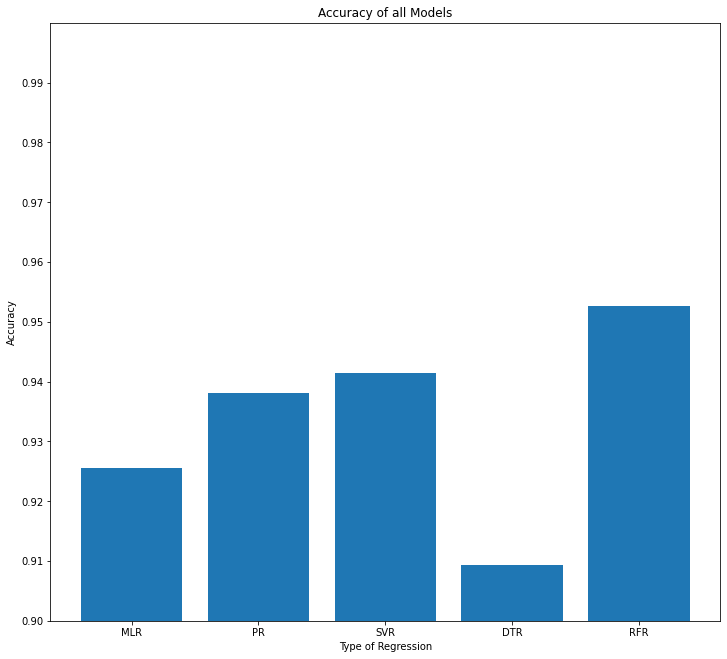

In [20]:
scores = [MLR, PR, SVR, DTR, RFR]
Labels = ['MLR', 'PR', 'SVR', 'DTR', 'RFR']

plt.figure(figsize = (12, 11))
plt.xticks(range(len(scores)), Labels)
plt.yticks(np.arange(0.9, 1, step=0.01))
plt.ylim(0.9,1)
plt.xlabel('Type of Regression')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.bar(range(len(scores)), scores) 
plt.show()

Looking at the values it looks ike hte best regression model to choose based purely on the R2 metric id the random forest regression


unsupisingly Decsion tree regression performs the worst as it is generaly not as good as the ensemble version


Maybe look into other ways of evaluating models for future projects 

Though now that I think about it accuracies above 90% seem a little too good to be true, maybe the dataset is to easy to predict?